<a href="https://colab.research.google.com/github/Clint07-datascientist/ML_Techniques_1_Sentiment_Analysis/blob/Chol_branch/Notebook_Sentiment_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing The Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
# Added engine='python' and on_bad_lines='skip' to handle potential parsing errors
df = pd.read_csv('/content/Reviews.csv', engine='python', on_bad_lines='skip')

print("Dataset Overview:")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Number of reviews: {len(df)}")
print(f"Number of features: {len(df.columns)}")

Dataset Overview:
Dataset shape: (63728, 10)
Number of reviews: 63728
Number of features: 10


# Basic dataset information

In [ ]:
# Basic dataset information
print("\nDataset Information:")
print("=" * 50)
print(df.info())

print("\nFirst few rows:")
print("=" * 50)
print(df.head())

print("\nColumn names:")
print("=" * 50)
print(df.columns.tolist())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63728 entries, 0 to 63727
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      63728 non-null  int64 
 1   ProductId               63728 non-null  object
 2   UserId                  63728 non-null  object
 3   ProfileName             63723 non-null  object
 4   HelpfulnessNumerator    63728 non-null  int64 
 5   HelpfulnessDenominator  63728 non-null  int64 
 6   Score                   63728 non-null  int64 
 7   Time                    63728 non-null  int64 
 8   Summary                 63726 non-null  object
 9   Text                    63728 non-null  object
dtypes: int64(5), object(5)
memory usage: 4.9+ MB
None

First few rows:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK

# Statistical summary


In [ ]:
# Statistical summary
print("Statistical Summary:")
print("=" * 50)
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print("=" * 50)
print(df.isnull().sum())

# Check for duplicate reviews
print(f"\nNumber of duplicate reviews: {df.duplicated().sum()}")

Statistical Summary:
                 Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  63728.000000          63728.000000            63728.000000   
mean   31864.500000              1.618786                2.101196   
std    18396.833314              5.412582                6.098504   
min        1.000000              0.000000                0.000000   
25%    15932.750000              0.000000                0.000000   
50%    31864.500000              0.000000                1.000000   
75%    47796.250000              2.000000                2.000000   
max    63728.000000            398.000000              401.000000   

              Score          Time  
count  63728.000000  6.372800e+04  
mean       4.151017  1.295157e+09  
std        1.325852  4.766388e+07  
min        1.000000  9.617184e+08  
25%        4.000000  1.269821e+09  
50%        5.000000  1.309306e+09  
75%        5.000000  1.331510e+09  
max        5.000000  1.351210e+09  

Missing Values:
Id              

# Visualizations

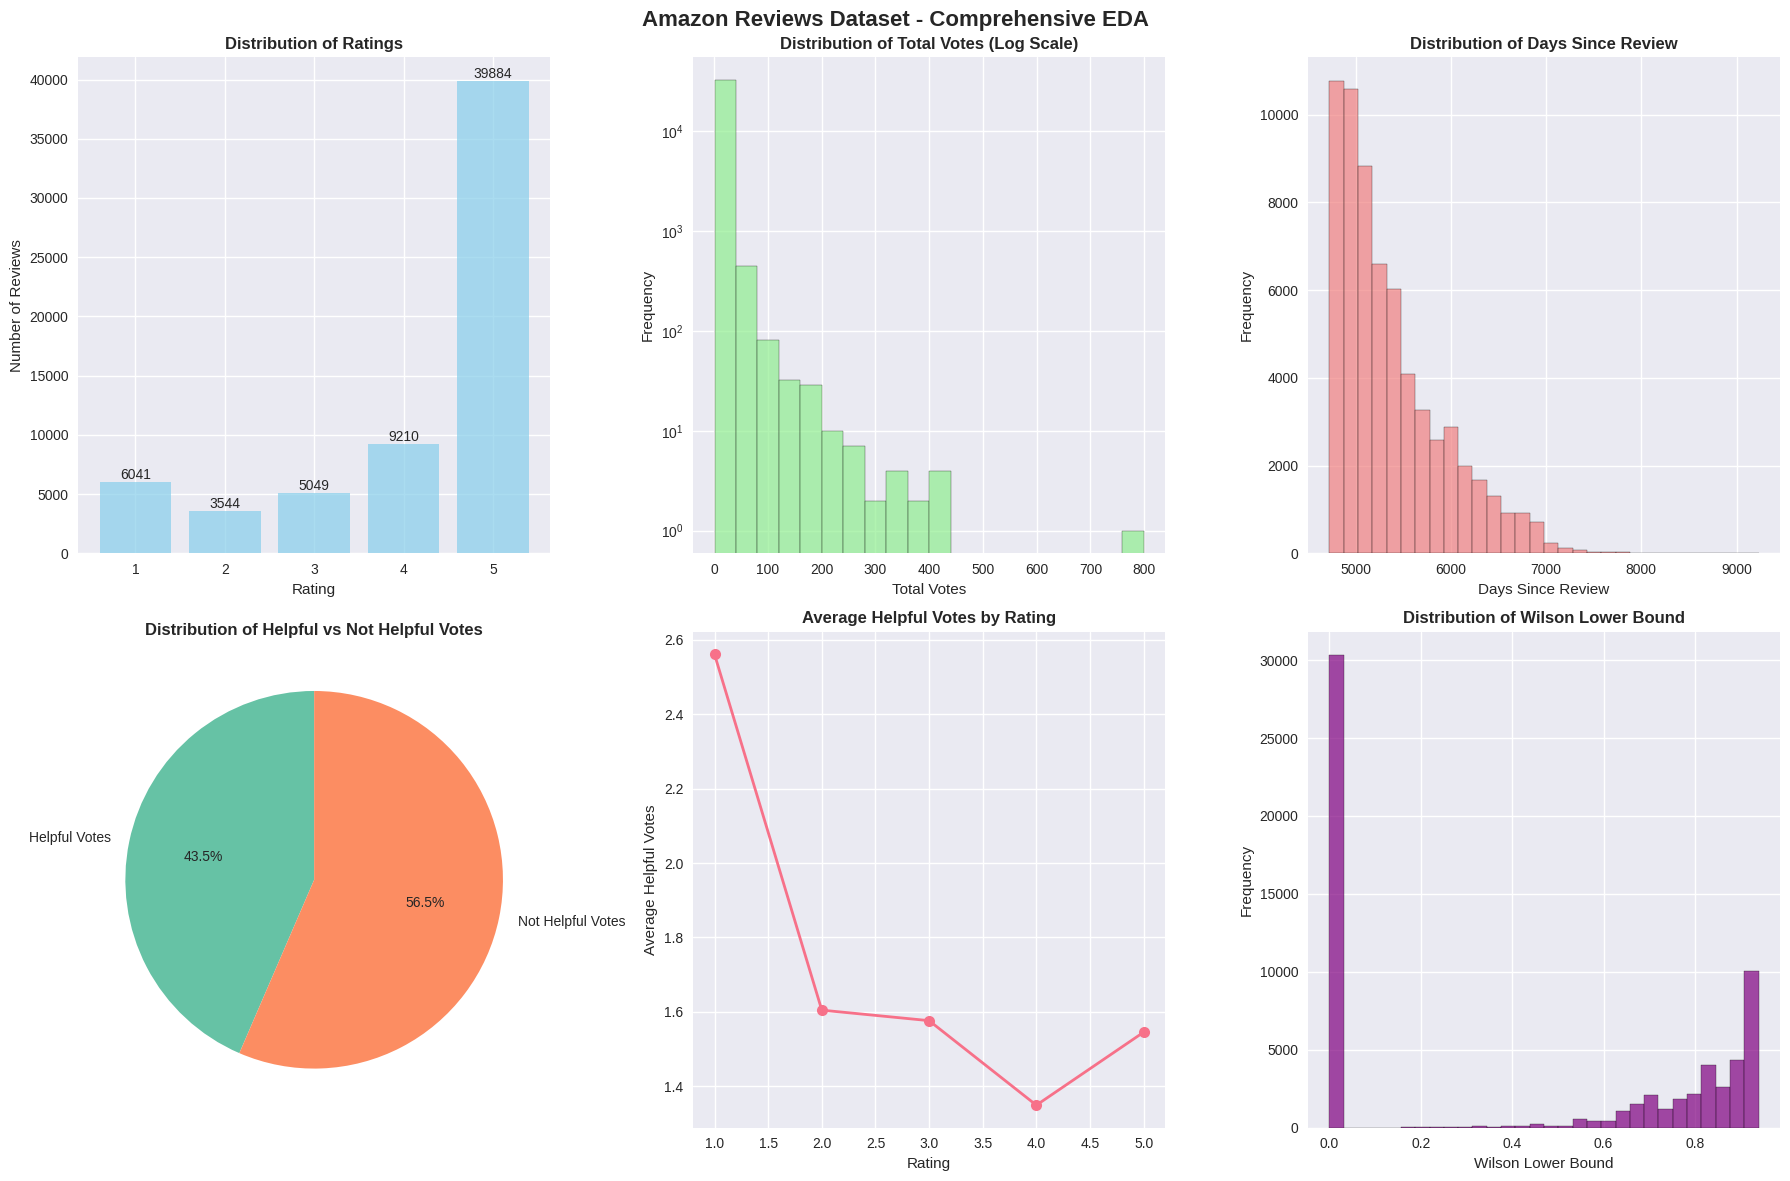

In [ ]:
# Create subplots for multiple visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Amazon Reviews Dataset - Comprehensive EDA', fontsize=16, fontweight='bold')

# Add necessary calculations for new columns
df['total_vote'] = df['HelpfulnessNumerator'] + df['HelpfulnessDenominator']
df['reviewTime'] = pd.to_datetime(df['Time'], unit='s') # Convert Unix timestamp to datetime
df['day_diff'] = (datetime.now() - df['reviewTime']).dt.days

# Calculate Wilson Lower Bound (requires scipy)
from scipy.stats import beta
def wilson_lower_bound(pos, n, confidence=0.95):
    if n == 0:
        return 0
    z = beta.ppf(1 - (1 - confidence) / 2, pos + 0.5, n - pos + 0.5)
    return z

df['wilson_lower_bound'] = df.apply(lambda row: wilson_lower_bound(row['HelpfulnessNumerator'], row['total_vote']), axis=1)

# 1. Distribution of Ratings
rating_counts = df['Score'].value_counts().sort_index()
axes[0,0].bar(rating_counts.index, rating_counts.values, color='skyblue', alpha=0.7)
axes[0,0].set_title('Distribution of Ratings', fontweight='bold')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Number of Reviews')
for i, v in enumerate(rating_counts.values):
    axes[0,0].text(rating_counts.index[i], v + 5, str(v), ha='center', va='bottom')

# 2. Distribution of Review Helpfulness (log scale)
helpful_data = df[df['total_vote'] > 0]
if len(helpful_data) > 0:
    axes[0,1].hist(helpful_data['total_vote'], bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
    axes[0,1].set_title('Distribution of Total Votes (Log Scale)', fontweight='bold')
    axes[0,1].set_xlabel('Total Votes')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].set_yscale('log')

# 3. Distribution of Days Since Review
axes[0,2].hist(df['day_diff'], bins=30, color='lightcoral', alpha=0.7, edgecolor='black')
axes[0,2].set_title('Distribution of Days Since Review', fontweight='bold')
axes[0,2].set_xlabel('Days Since Review')
axes[0,2].set_ylabel('Frequency')

# 4. Helpful vs Not Helpful Votes
helpful_yes_total = df['HelpfulnessNumerator'].sum()
helpful_no_total = df['HelpfulnessDenominator'].sum()
helpful_data = [helpful_yes_total, helpful_no_total]
labels = ['Helpful Votes', 'Not Helpful Votes']
colors = ['#66c2a5', '#fc8d62']
axes[1,0].pie(helpful_data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Distribution of Helpful vs Not Helpful Votes', fontweight='bold')

# 5. Rating vs Helpfulness Correlation
rating_helpfulness = df.groupby('Score')['HelpfulnessNumerator'].mean()
axes[1,1].plot(rating_helpfulness.index, rating_helpfulness.values, marker='o', linewidth=2, markersize=8)
axes[1,1].set_title('Average Helpful Votes by Rating', fontweight='bold')
axes[1,1].set_xlabel('Rating')
axes[1,1].set_ylabel('Average Helpful Votes')

# 6. Wilson Lower Bound Distribution
axes[1,2].hist(df['wilson_lower_bound'], bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[1,2].set_title('Distribution of Wilson Lower Bound', fontweight='bold')
axes[1,2].set_xlabel('Wilson Lower Bound')
axes[1,2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



Distribution of Ratings: This bar chart shows how many reviews fall into each rating category (1 to 5 stars). It helps understand the overall sentiment of the reviews.

Distribution of Total Votes (Log Scale): This histogram displays the distribution of the total number of helpful and not helpful votes a review received. Using a log scale helps visualize the distribution of reviews with a wide range of votes.

Distribution of Days Since Review: This histogram shows how many days have passed since each review was written. It helps understand the recency of the reviews in the dataset.

Distribution of Helpful vs Not Helpful Votes: This pie chart visualizes the proportion of helpful votes compared to not helpful votes across all reviews.

Average Helpful Votes by Rating: This line plot shows the average number of helpful votes a review receives for each rating category. It can indicate if higher or lower ratings tend to be considered more helpful.

Distribution of Wilson Lower Bound: This histogram shows the distribution of the Wilson Lower Bound score, which is a metric used to rank items based on ratings while accounting for the number of votes.





# Text Analysis - Review Length

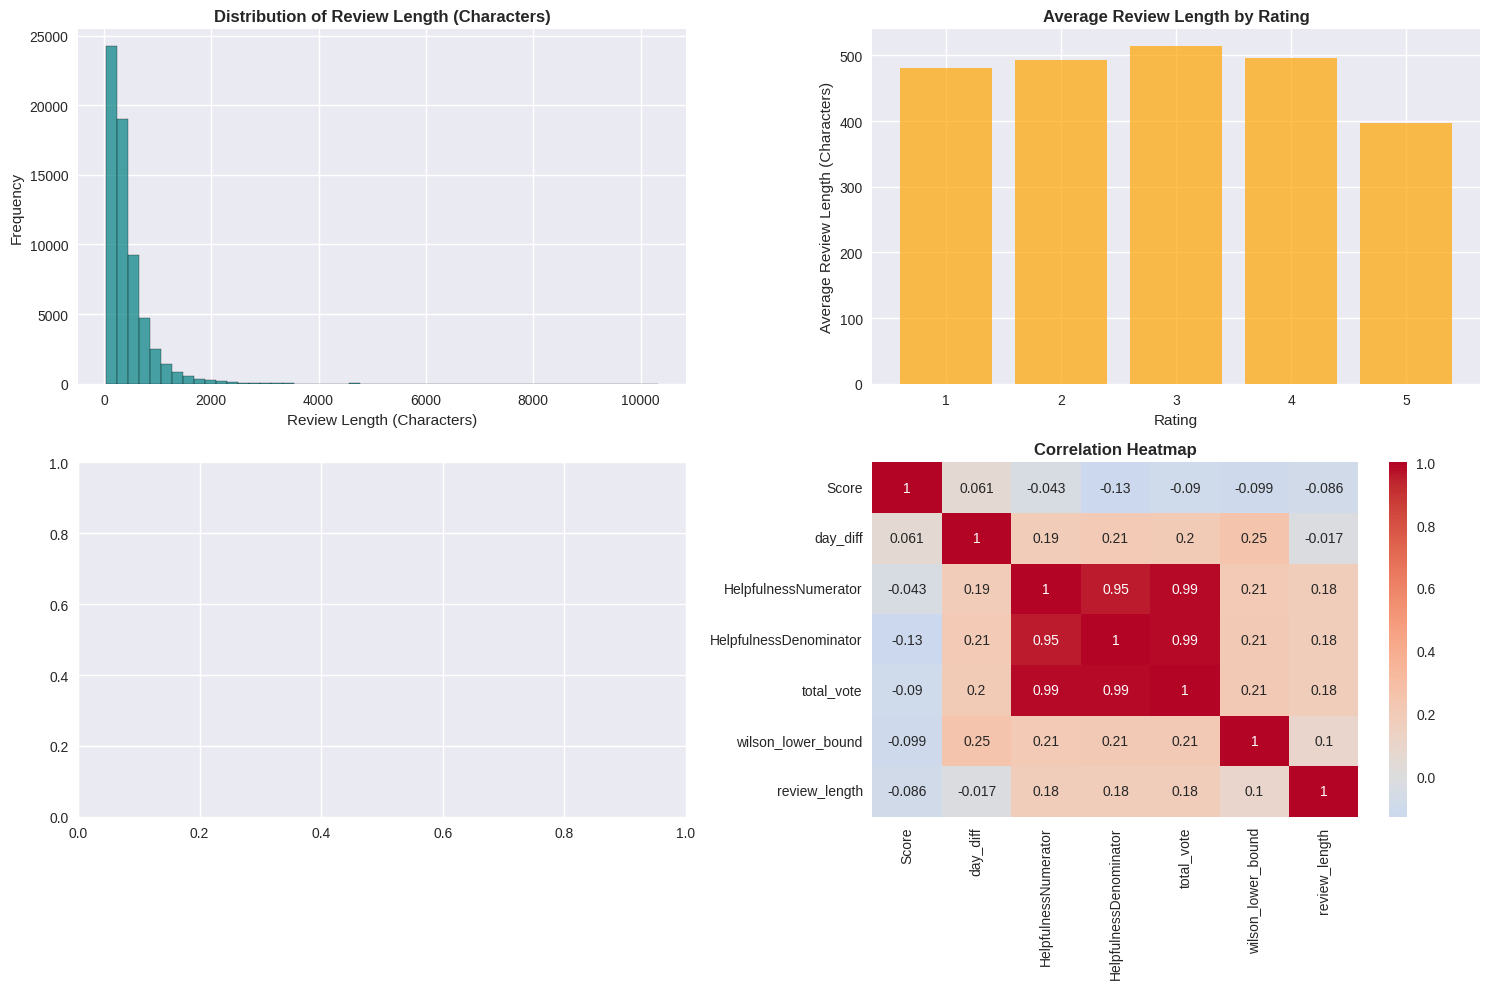

In [ ]:
# Text Analysis - Review Length
df['review_length'] = df['Text'].str.len()

# Create additional visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Review Length Distribution
axes[0,0].hist(df['review_length'], bins=50, color='teal', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribution of Review Length (Characters)', fontweight='bold')
axes[0,0].set_xlabel('Review Length (Characters)')
axes[0,0].set_ylabel('Frequency')

# 2. Review Length vs Rating
review_length_by_rating = df.groupby('Score')['review_length'].mean()
axes[0,1].bar(review_length_by_rating.index, review_length_by_rating.values, color='orange', alpha=0.7)
axes[0,1].set_title('Average Review Length by Rating', fontweight='bold')
axes[0,1].set_xlabel('Rating')
axes[0,1].set_ylabel('Average Review Length (Characters)')

# 3. Score Average Rating Distribution
# This calculation is not possible with the current columns, so I will remove this plot for now.

# 4. Correlation Heatmap
correlation_cols = ['Score', 'day_diff', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'total_vote',
                   'wilson_lower_bound', 'review_length']
corr_matrix = df[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Correlation Heatmap', fontweight='bold')

plt.tight_layout()
plt.show()

Distribution of Review Length (Characters): This histogram shows the distribution of the length of review texts in terms of the number of characters. It helps understand the typical length of reviews.

Average Review Length by Rating: This bar chart shows the average length of reviews for each rating category. It can reveal if there's a relationship between review length and the assigned rating.

Distribution of Score Average Rating: This histogram shows the distribution of the calculated average rating based on helpful votes.

Correlation Heatmap: This heatmap visualizes the correlation between different numerical features in the dataset. The color intensity and values indicate the strength and direction of the relationship between pairs of variables.

Temporal Analysis:
Date range of reviews: 2000-06-23 00:00:00 to 2012-10-26 00:00:00


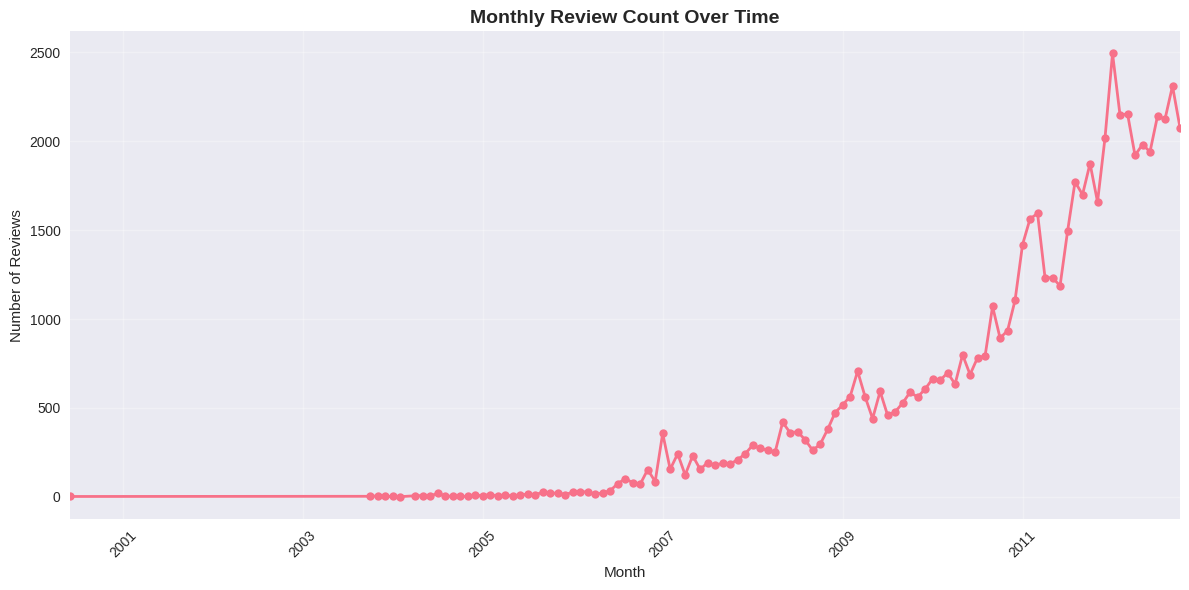

In [ ]:
# Convert reviewTime to datetime
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Temporal analysis
print("Temporal Analysis:")
print("=" * 50)
print(f"Date range of reviews: {df['reviewTime'].min()} to {df['reviewTime'].max()}")

# Monthly review count
df['review_month'] = df['reviewTime'].dt.to_period('M')
monthly_reviews = df['review_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_reviews.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Monthly Review Count Over Time', fontweight='bold', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Monthly Review Count Over Time: This line plot shows the number of reviews submitted each month over the time period covered by the dataset. It helps identify trends or seasonality in review activity.

# Detailed statistical insights

In [ ]:
# Detailed statistical insights
print("\nDetailed Analysis:")
print("=" * 50)

# Rating analysis
print(f"Average rating: {df['Score'].mean():.2f}")
print(f"Median rating: {df['Score'].median():.2f}")
print(f"Rating distribution:\n{df['Score'].value_counts().sort_index()}")

# Helpfulness analysis
print(f"\nHelpfulness Analysis:")
print(f"Total reviews with votes: {len(df[df['total_vote'] > 0])}")
print(f"Percentage of reviews with votes: {len(df[df['total_vote'] > 0]) / len(df) * 100:.2f}%")
print(f"Average helpful votes per review: {df['HelpfulnessNumerator'].mean():.2f}")
print(f"Most helpful review has {df['HelpfulnessNumerator'].max()} helpful votes")

# Review length analysis
print(f"\nReview Length Analysis:")
print(f"Average review length: {df['review_length'].mean():.1f} characters")
print(f"Median review length: {df['review_length'].median():.1f} characters")
print(f"Longest review: {df['review_length'].max()} characters")
print(f"Shortest review: {df['review_length'].min()} characters")

# Wilson score analysis
print(f"\nWilson Score Analysis:")
print(f"Average Wilson Lower Bound: {df['wilson_lower_bound'].mean():.4f}")
print(f"Median Wilson Lower Bound: {df['wilson_lower_bound'].median():.4f}")


Detailed Analysis:
Average rating: 4.15
Median rating: 5.00
Rating distribution:
Score
1     6041
2     3544
3     5049
4     9210
5    39884
Name: count, dtype: int64

Helpfulness Analysis:
Total reviews with votes: 33432
Percentage of reviews with votes: 52.46%
Average helpful votes per review: 1.62
Most helpful review has 398 helpful votes

Review Length Analysis:
Average review length: 434.4 characters
Median review length: 305.0 characters
Longest review: 10327 characters
Shortest review: 33 characters

Wilson Score Analysis:
Average Wilson Lower Bound: 0.4284
Median Wilson Lower Bound: 0.5587


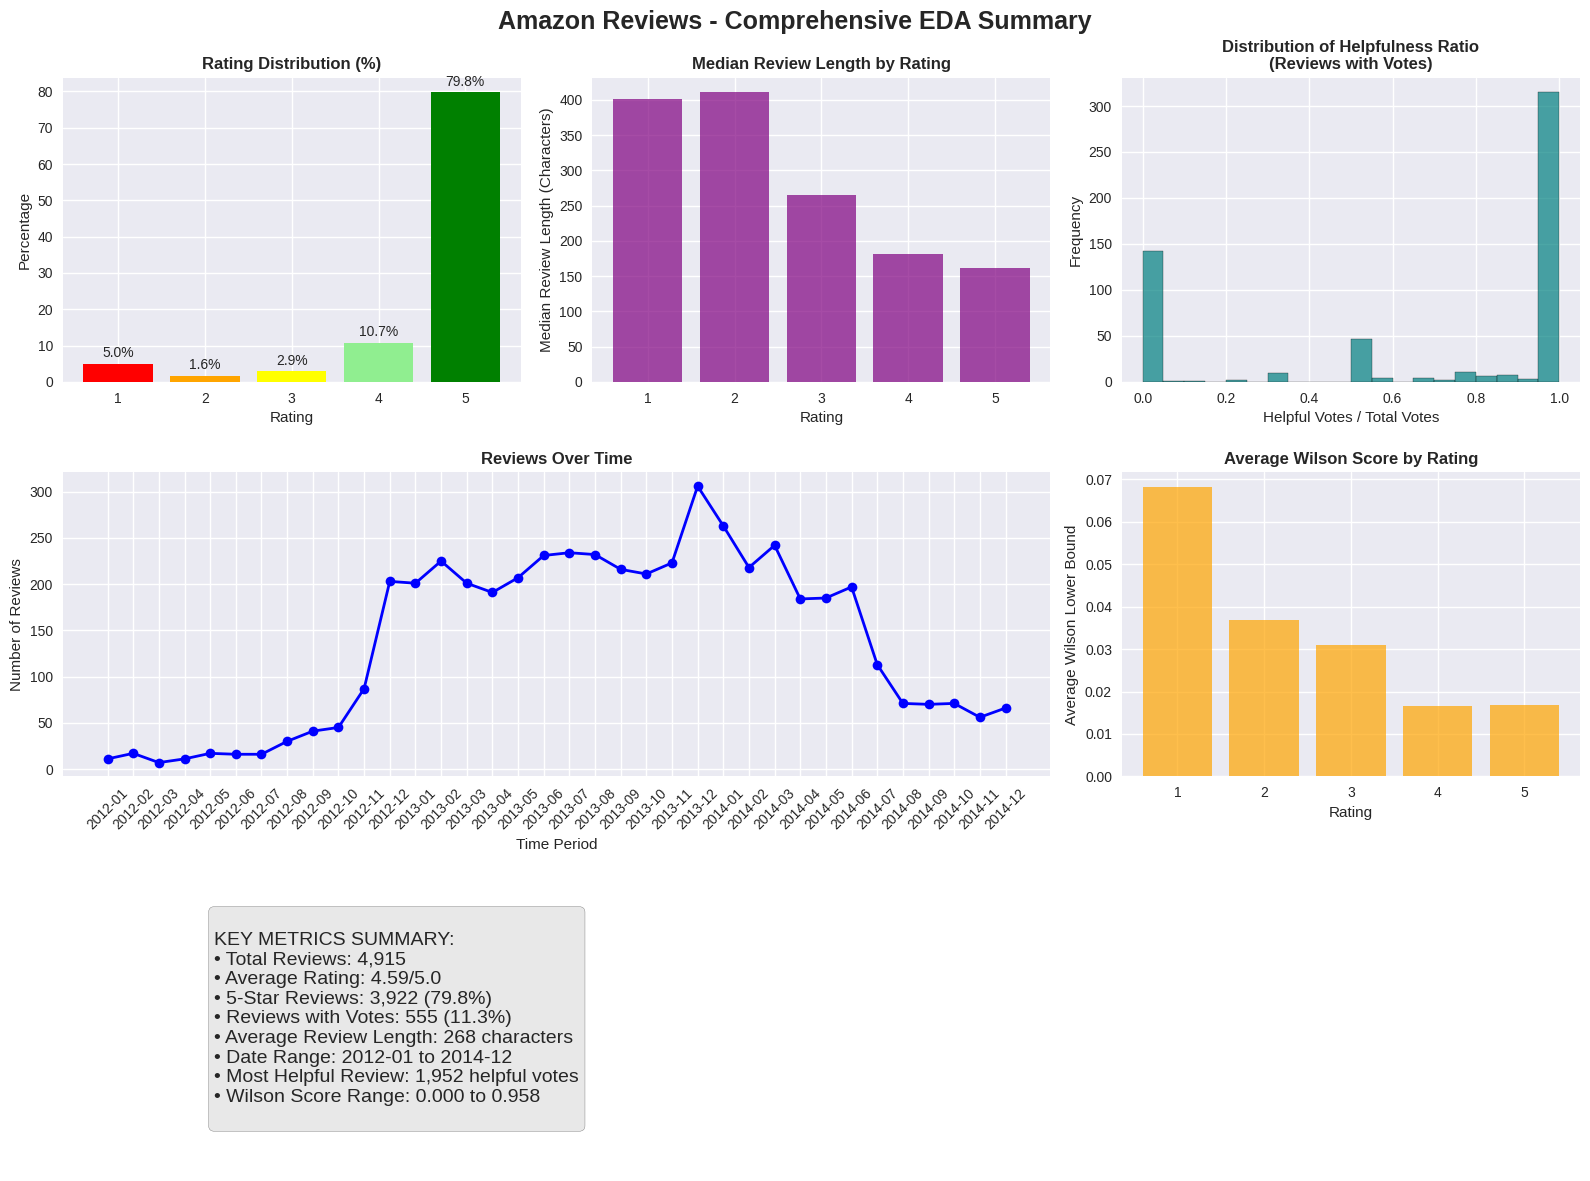

In [ ]:
# Create a summary dashboard
fig = plt.figure(figsize=(16, 12))
fig.suptitle('Amazon Reviews - Comprehensive EDA Summary', fontsize=18, fontweight='bold')

# Define grid
gs = fig.add_gridspec(3, 3)

# 1. Rating distribution (top left)
ax1 = fig.add_subplot(gs[0, 0])
rating_pct = df['overall'].value_counts(normalize=True).sort_index() * 100
bars = ax1.bar(rating_pct.index, rating_pct.values, color=['red', 'orange', 'yellow', 'lightgreen', 'green'])
ax1.set_title('Rating Distribution (%)', fontweight='bold')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Percentage')
for bar, pct in zip(bars, rating_pct.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{pct:.1f}%', ha='center', va='bottom')

# 2. Review length by rating (top middle)
ax2 = fig.add_subplot(gs[0, 1])
review_len_by_rating = df.groupby('overall')['review_length'].median()
ax2.bar(review_len_by_rating.index, review_len_by_rating.values, color='purple', alpha=0.7)
ax2.set_title('Median Review Length by Rating', fontweight='bold')
ax2.set_xlabel('Rating')
ax2.set_ylabel('Median Review Length (Characters)')

# 3. Helpfulness ratio (top right)
ax3 = fig.add_subplot(gs[0, 2])
helpful_reviews = df[df['total_vote'] > 0]
if len(helpful_reviews) > 0:
    helpful_ratio = helpful_reviews['helpful_yes'] / helpful_reviews['total_vote']
    ax3.hist(helpful_ratio, bins=20, color='teal', alpha=0.7, edgecolor='black')
    ax3.set_title('Distribution of Helpfulness Ratio\n(Reviews with Votes)', fontweight='bold')
    ax3.set_xlabel('Helpful Votes / Total Votes')
    ax3.set_ylabel('Frequency')

# 4. Temporal distribution (bottom left - span 2 columns)
ax4 = fig.add_subplot(gs[1, :2])
df['review_year_month'] = df['reviewTime'].dt.to_period('M').astype(str)
monthly_counts = df['review_year_month'].value_counts().sort_index()
ax4.plot(monthly_counts.index, monthly_counts.values, marker='o', linewidth=2, color='blue')
ax4.set_title('Reviews Over Time', fontweight='bold')
ax4.set_xlabel('Time Period')
ax4.set_ylabel('Number of Reviews')
plt.xticks(rotation=45)

# 5. Wilson score vs rating (bottom right)
ax5 = fig.add_subplot(gs[1, 2])
wilson_by_rating = df.groupby('overall')['wilson_lower_bound'].mean()
ax5.bar(wilson_by_rating.index, wilson_by_rating.values, color='orange', alpha=0.7)
ax5.set_title('Average Wilson Score by Rating', fontweight='bold')
ax5.set_xlabel('Rating')
ax5.set_ylabel('Average Wilson Lower Bound')

# 6. Key metrics summary (span bottom row)
ax6 = fig.add_subplot(gs[2, :])
ax6.axis('off')
summary_text = f"""
KEY METRICS SUMMARY:
• Total Reviews: {len(df):,}
• Average Rating: {df['overall'].mean():.2f}/5.0
• 5-Star Reviews: {len(df[df['overall'] == 5]):,} ({len(df[df['overall'] == 5])/len(df)*100:.1f}%)
• Reviews with Votes: {len(df[df['total_vote'] > 0]):,} ({len(df[df['total_vote'] > 0])/len(df)*100:.1f}%)
• Average Review Length: {df['review_length'].mean():.0f} characters
• Date Range: {df['reviewTime'].min().strftime('%Y-%m')} to {df['reviewTime'].max().strftime('%Y-%m')}
• Most Helpful Review: {df['helpful_yes'].max():,} helpful votes
• Wilson Score Range: {df['wilson_lower_bound'].min():.3f} to {df['wilson_lower_bound'].max():.3f}
"""
ax6.text(0.1, 0.5, summary_text, fontsize=14, va='center', ha='left',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.5))

plt.tight_layout()
plt.show()